<a href="https://colab.research.google.com/github/Logeshwaran715/Logesh/blob/master/Bigmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import  scipy as sc
%matplotlib inline


# Reading Bigmart Dataset

In [34]:
df=pd.read_csv('https://github.com/karthicsalem/fods-sem-5/raw/master/bigmart.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Checking for null values

In [35]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
df.shape

(8523, 12)

In [37]:
df['Item_Weight'].nunique()

415

In [38]:
d=df.copy()
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Modifying Fat Category

In [39]:
d['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [40]:
d['Item_Fat_Content'] = d['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
d['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Filling Null Values Item_Weight 
  *   By Average value of weight for each Item_Identifier
  *   Remaining by Average value of Item_fat_content 



In [41]:
d['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [42]:
b=d.groupby(['Item_Identifier'])
b.mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600,0.031956,141.865400,2001.166667,1843.600200
DRA24,19.350,0.048062,164.086800,1995.000000,2246.218971
DRA59,8.270,0.134718,185.179900,1995.875000,2614.430150
DRB01,7.390,0.082126,189.586333,1990.333333,1518.024000
DRB13,6.115,0.008002,189.693000,1999.000000,2428.838400
...,...,...,...,...,...
NCZ30,6.590,0.024956,120.752657,1997.428571,1807.647000
NCZ41,19.850,0.051623,125.630400,2001.800000,1827.487840
NCZ42,10.500,0.009044,236.644800,1999.000000,3839.801760


In [43]:
d['Item_Weight']=d['Item_Weight'].fillna(d.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
d

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [44]:
d[d['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [45]:
d['Item_Weight']=d['Item_Weight'].fillna(d.groupby(['Item_Type','Item_Fat_Content'])['Item_Weight'].transform('mean'))
d[d['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Filling Null Values in Outlet_Size
*   By most frequent value of Outlet_Type




In [46]:
d['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [47]:
from scipy.stats import mode
common= d.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x)[0]) )
common

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [48]:
temp= d['Outlet_Size'].isnull()
d.loc[temp,'Outlet_Size'] = d.loc[temp,'Outlet_Type'].apply(lambda x: common[x])
d.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Categorising using Item_identifier


0.   Drinks
1.   Food
2.   Non-Consumable





In [49]:
d['Item_Category']=d['Item_Identifier'].str[:2]
rename={'Item_Category':{'FD':'Food','NC':'Non-Consumable','DR':'Drinks'}}
d.replace(rename,inplace=True)
d['Item_Category']=d['Item_Category'].astype('category')
d['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

In [50]:
d['Item_Cat']=d['Item_Category'].cat.codes
d['Item_Cat'].value_counts()

1    6125
2    1599
0     799
Name: Item_Cat, dtype: int64

In [51]:
sns.set_style('white')
sns.set_style('ticks')

##1

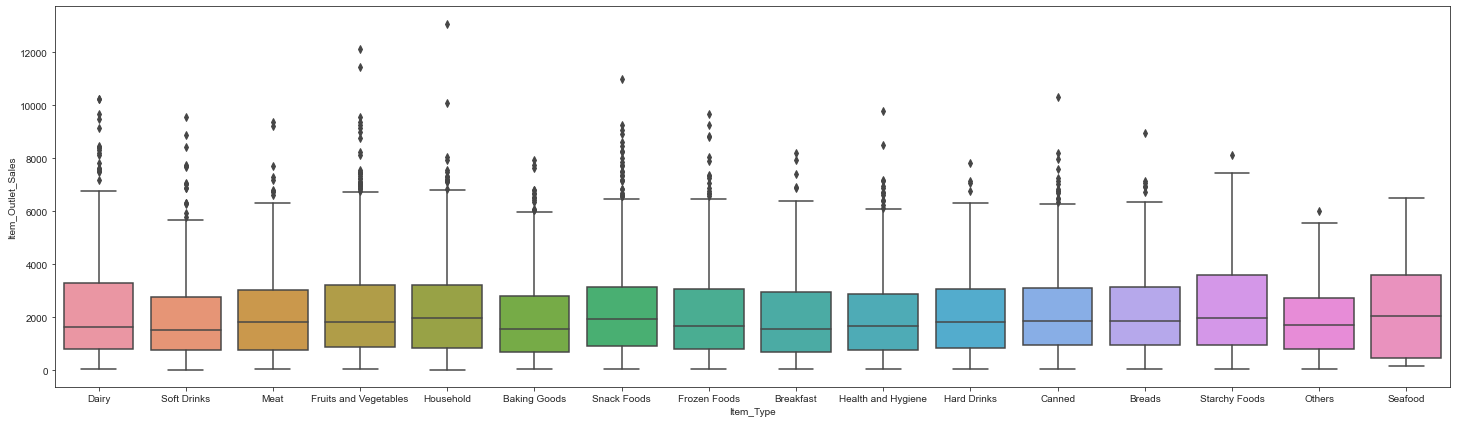

In [52]:
plt.figure(figsize=(25,7))
sns.boxplot(d['Item_Type'],d['Item_Outlet_Sales']);

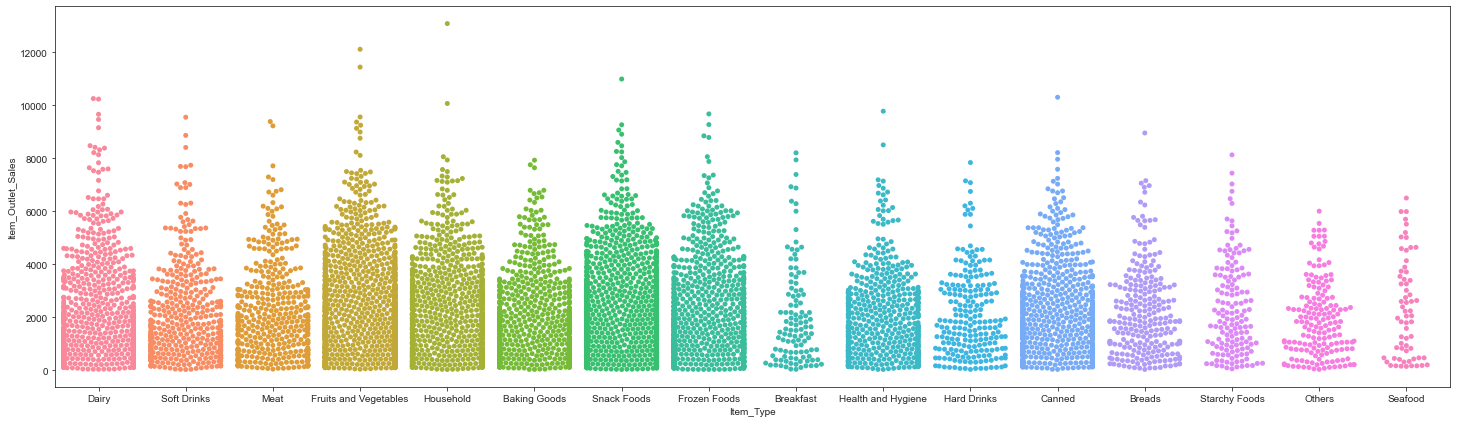

In [53]:
plt.figure(figsize=(25,7))
sns.swarmplot(d['Item_Type'],d['Item_Outlet_Sales']);


##Conclusion
From the above Box plot we can find that the Item sales above 6000 are considered outliers and the scatter plot re emphasizes that the item sales are mostly below the value of 6000


##2

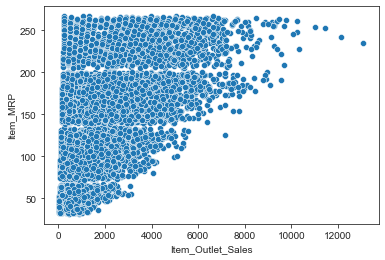

In [54]:
sns.scatterplot(data=d,x="Item_Outlet_Sales",y="Item_MRP");

##Conclusion
Though from the previous scatter plot we found the item sales on a average is 6000 from this plot we infer that the item with price 50 and 100 has a substantial sale in the range of 2000 and 4000 respectively.The other two item price has the range of 0-6000 like we inferred above.

##3

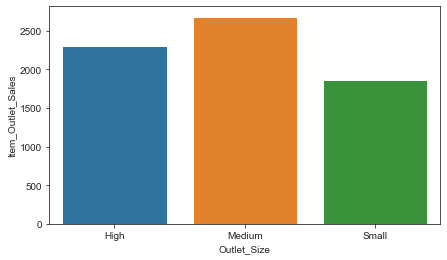

In [55]:
plt.figure(figsize=(7,4))
sns.set_style('white')
sns.set_style('ticks')
h=d.groupby('Outlet_Size').mean()
sns.barplot(h.index,h['Item_Outlet_Sales']);

##Conclusion
From this box plot we find that the shops of medium size has more sales on average follwed by high and the small sized shops.

##4

In [58]:
'''plt.figure(figsize=(17,7))
sns.set_style('white')
sns.set_style('ticks')
g=d.groupby(['Item_Category','Item_Fat_Content']).mean()
sns.barplot(g.index,g['Item_Visibility']);
#Even though visibility is higher for drinks-regular, drinks-low fat and Food-regular have higher sales.'''

"plt.figure(figsize=(17,7))\nsns.set_style('white')\nsns.set_style('ticks')\ng=d.groupby(['Item_Category','Item_Fat_Content']).mean()\nsns.barplot(g.index,g['Item_Visibility']);\n#Even though visibility is higher for drinks-regular, drinks-low fat and Food-regular have higher sales."

##Conclusion
In every shop the average visibility of drinks with regular(with regular fat content) is more,meaning that the drinks have been alloted more spaces for display.

##5

In [57]:
'''plt.figure(figsize=(17,7))
sns.set_style('white')
sns.set_style('ticks')
g=d.groupby(['Item_Category','Item_Fat_Content']).mean()
sns.barplot(g.index,g['Item_Outlet_Sales']);'''

"plt.figure(figsize=(17,7))\nsns.set_style('white')\nsns.set_style('ticks')\ng=d.groupby(['Item_Category','Item_Fat_Content']).mean()\nsns.barplot(g.index,g['Item_Outlet_Sales']);"

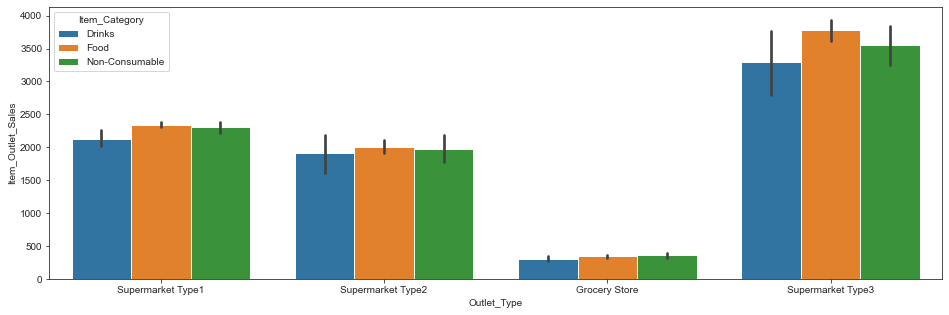

In [26]:
plt.figure(figsize=(16,5))
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=d,hue='Item_Category');
#On average food items have higher outlet sales.

##Conclusion
From the above two barplots it is inferred that the sales of food items is more than that of drinks and non_consumables.We can also infer from the first plot people prefer low fat content products.

##6

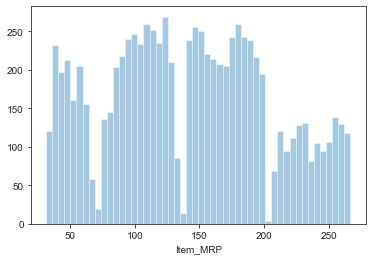

In [27]:
sns.distplot(d["Item_MRP"],kde=False,bins=50)
plt.show()
#We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

##Conclusion
The range for the item price is from 0-250.But from this distplot is clear that the item price is not evenly distributed.In each range(meaning 0-100,100-150,150-200,200-300),the item price lies predominantly in some ranges groups.

##7

In [59]:
'''f, axes = plt.subplots(1, 2, figsize=(20,7))
f.suptitle('Sales and visibility \nBy category and fat', fontsize=25,fontweight="bold")
#f.figsize=(20,7)

g=d.groupby(['Item_Category','Item_Fat_Content']).mean()
sns.barplot(g.index,g['Item_Visibility'], ax=axes[0]);
axes[0].set_title('Visibility', color="green",fontweight="bold")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

h=d.groupby(['Item_Category','Item_Fat_Content']).mean()
sns.barplot(h.index,h['Item_Outlet_Sales'],ax=axes[1]);
axes[1].set_title('Sales', color="orange",fontweight="bold")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.show()'''


'f, axes = plt.subplots(1, 2, figsize=(20,7))\nf.suptitle(\'Sales and visibility \nBy category and fat\', fontsize=25,fontweight="bold")\n#f.figsize=(20,7)\n\ng=d.groupby([\'Item_Category\',\'Item_Fat_Content\']).mean()\nsns.barplot(g.index,g[\'Item_Visibility\'], ax=axes[0]);\naxes[0].set_title(\'Visibility\', color="green",fontweight="bold")\naxes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)\n\nh=d.groupby([\'Item_Category\',\'Item_Fat_Content\']).mean()\nsns.barplot(h.index,h[\'Item_Outlet_Sales\'],ax=axes[1]);\naxes[1].set_title(\'Sales\', color="orange",fontweight="bold")\naxes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)\n\nplt.show()'

##Conclusion
From the prevoius graphs(4) we found out that Item category of food has more sales.From which we theorized that visiblity of Food will be more.But in above plot when both visiblity and item sales are compared its found that visibilty and sales are not corelated like they should have been.

In [29]:
d['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

##8

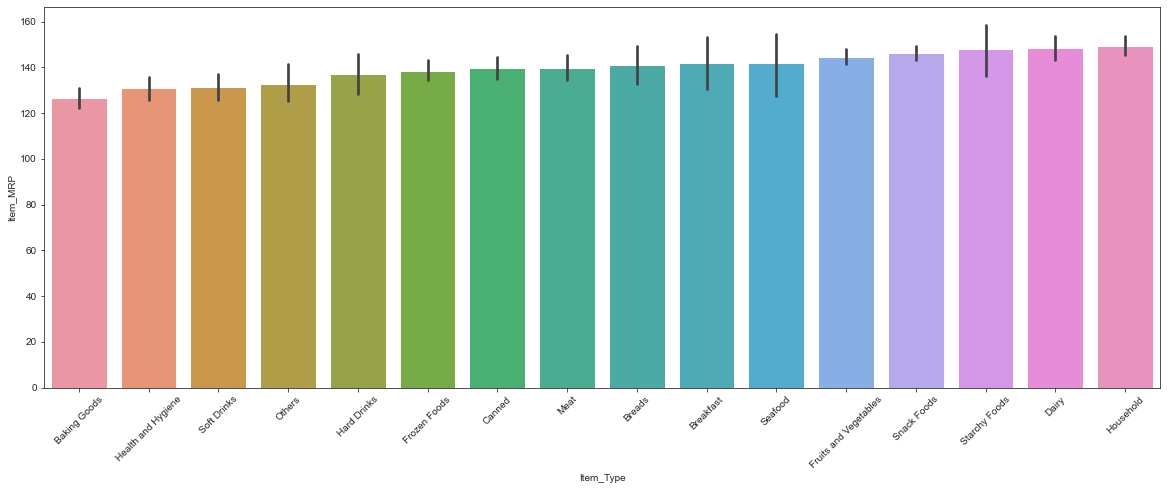

In [30]:
plt.figure(figsize=(20,7))

sns.barplot(data=d, x="Item_Type",y="Item_MRP",order=d.groupby("Item_Type").mean().sort_values("Item_MRP").index)
plt.xticks(rotation=45)
plt.show()

##Conclusion
The barplot shows that though Starchy food has the maximum item mrp, on an average the item mrp of Household is more followed by others as depicted in the plot.

##9

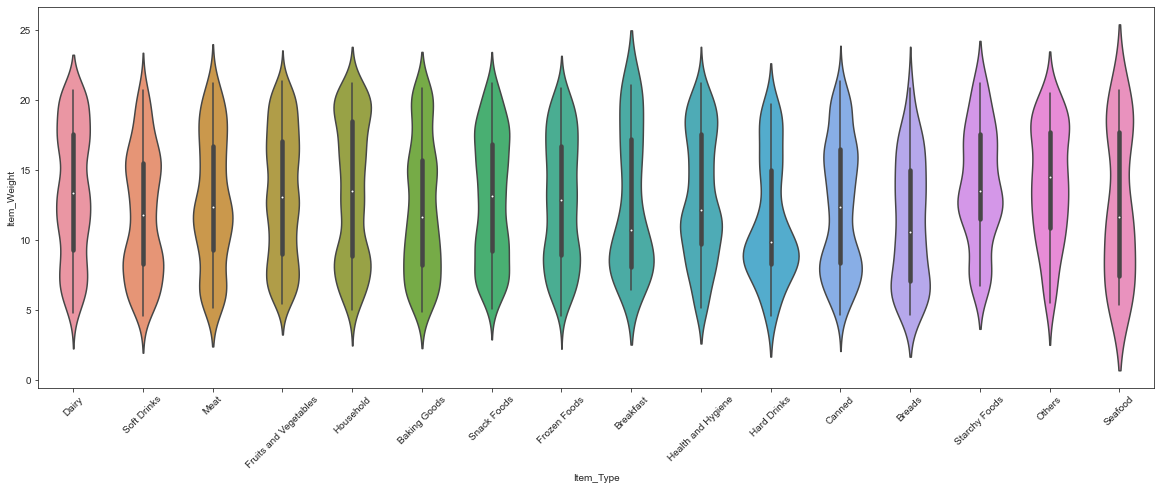

In [31]:
plt.figure(figsize=(20,7))

sns.violinplot(data=d, x="Item_Type",y="Item_Weight")
plt.xticks(rotation=45)
plt.show()
#Expecting some products to lie in a particular range, we created this violing plot. But from the given plot, we conclue that the weights are so diverse.

##Conclusion
From this violin plot we can see that the item weights in each item types is evenly distributed all along the range of 0-25.
Though the only anomaly is that the Hard drinks have values slightly predominant in the range of 5-10 

##10

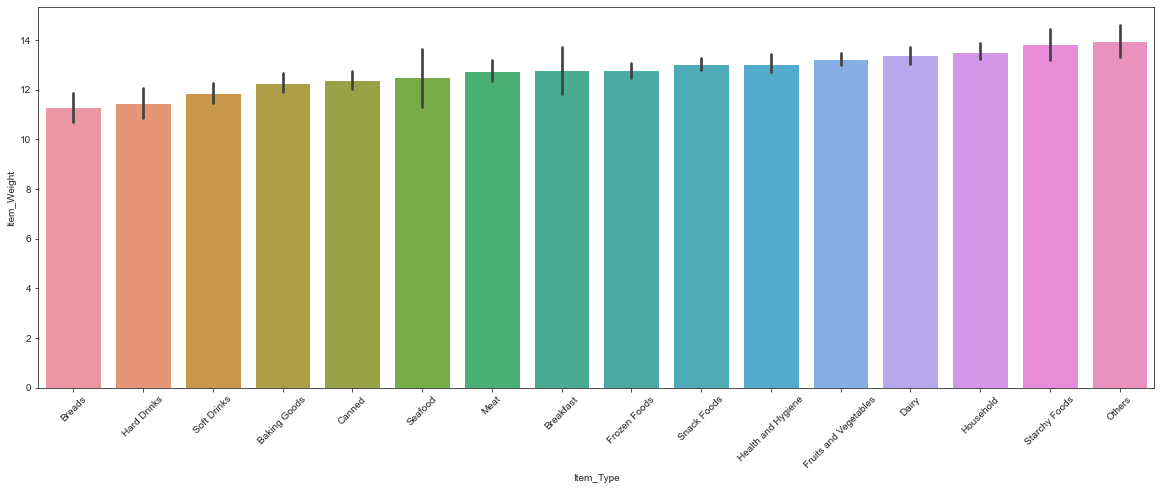

In [32]:
plt.figure(figsize=(20,7))

sns.barplot(data=d, x="Item_Type",y="Item_Weight",order=d.groupby("Item_Type").mean().sort_values("Item_Weight").index)
plt.xticks(rotation=45)
plt.show()

##Conclusion
From this plot it can be concluded that the average weight of all item types lies in the range of 10-14 and the item type Others has the highest average weight.

